# How to simulate sales data in Python

Why simulate data?

Have you ever spent an inordinate amount of time looking for the right
data set to try out an analytical technique, but you don't quite find
what you are looking for.

Well, why not just create your own dataset for maximum flexibility which
gives you a few advantages:

1.  To test your analysis to make sure it's working.
2.  To make changes to your dataset to see what happens and how your
    conclusions might change based on different parameters . (e.g. How
    sales are impacted by different levels of the price of our product).

## Import Packages

In [1]:
#Import pandas and numpy
import pandas as pd
import numpy as np
from numpy import random

# From matplotlib, import pyplot under the alias plt
from matplotlib import pyplot as plt

#Import Seaborn
import seaborn as sns

#Import datetime for working with dates
from datetime import datetime

## Data Simulation

First, we will create a skeleton data frame to hold our variables and
initialize with 0 values for all columns except the date column.

1.  Sales date (week level granularity)
2.  Unit sales
3.  Unit price
4.  Paid social ads
5.  Promotion - whether there was a promotion this week.

In [2]:
#Set seed so that when reproducing the dataset, we get the same results.
np.random.seed(90210)

Visit https://pandas.pydata.org/docs/user_guide/timeseries.html for a list of all parameters we can use in the freq argument of the date_range function, but since we want weekly dates, we will use the freq = 'W-MON' argument.


In [3]:
#Create date sequence of 52 weeks using date_range function
sales_date = pd.date_range('2019-01-01', periods=52, freq = 'W-MON')

#Check results
print(sales_date)

DatetimeIndex(['2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28',
               '2019-02-04', '2019-02-11', '2019-02-18', '2019-02-25',
               '2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25',
               '2019-04-01', '2019-04-08', '2019-04-15', '2019-04-22',
               '2019-04-29', '2019-05-06', '2019-05-13', '2019-05-20',
               '2019-05-27', '2019-06-03', '2019-06-10', '2019-06-17',
               '2019-06-24', '2019-07-01', '2019-07-08', '2019-07-15',
               '2019-07-22', '2019-07-29', '2019-08-05', '2019-08-12',
               '2019-08-19', '2019-08-26', '2019-09-02', '2019-09-09',
               '2019-09-16', '2019-09-23', '2019-09-30', '2019-10-07',
               '2019-10-14', '2019-10-21', '2019-10-28', '2019-11-04',
               '2019-11-11', '2019-11-18', '2019-11-25', '2019-12-02',
               '2019-12-09', '2019-12-16', '2019-12-23', '2019-12-30'],
              dtype='datetime64[ns]', freq='W-MON')


We want to add weeks with marketing promotions. We can simulate promotions using the binomial distribution. The notation of the binomial distribution is B(n,p), where n is the number of experiments or trials, and p is the probability of success.

In [4]:
#Create weeks where there were promotions running. 10% likelihood of a promotion
promotion = np.random.binomial(n=1, p=0.10, size=len(sales_date))

#Check results
print(promotion)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


Let's create data for the paid social ads. We want to add Paid Social values for the range of dates between July and September and again in December.

In [5]:
#Create a repeating list of 0's
social = [0] * len(sales_date)

print(social)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Generate the product's price and place in a vector and then we'll use
the random.choices method to randomly create prices. We will only create two (2) price points for our product. We want to use random sampling with replacement. If you wanted to use random sampling without replacement, you could use the random.sample function from the random module.

In [6]:
import random #So as not to be confused with np.random
np.random.seed(90210)

prices_list = [4.50, 4.99]

#Create price values
price = random.choices(prices_list, k = len(sales_date))

#Check output
print(price)

[4.99, 4.99, 4.99, 4.99, 4.99, 4.99, 4.5, 4.99, 4.5, 4.5, 4.5, 4.99, 4.5, 4.5, 4.99, 4.99, 4.99, 4.5, 4.99, 4.99, 4.5, 4.5, 4.5, 4.5, 4.5, 4.99, 4.5, 4.5, 4.99, 4.5, 4.99, 4.99, 4.5, 4.5, 4.5, 4.99, 4.5, 4.99, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.99, 4.5, 4.99, 4.5, 4.5, 4.5, 4.99]


## Generate unit sales

Next step is to generate sales data based on unit sales and place into a temporary sales variable. Sales is randomly generated based on a poisson distribution.

In [7]:
#Generate unit sales - poisson distribution
temp_sales = np.random.poisson(size=len(sales_date), lam = 8300)

#Check results
print(temp_sales)

[8211 8273 8337 8386 8285 8395 8239 8267 8272 8259 8418 8363 8191 8259
 8228 8220 8504 8265 8397 8129 8372 8291 8337 8374 8307 8374 8294 8503
 8276 8335 8423 8329 8289 8209 8378 8210 8311 8207 8348 8259 8386 8399
 8227 8439 8171 8308 8276 8450 8267 8406 8237 8125]


In [8]:
#Scale sales up according to price to follow a logarithmic function
#Scale sales by multiplying sales by the log of price
temp_sales = temp_sales * np.log(price)

#Check output
print(temp_sales)

[13198.65625507 13298.31728147 13401.1931797  13479.95753928
 13317.60651239 13494.42446246 12392.09367204 13288.67266601
 12441.72822613 12422.17521998 12661.32352606 13442.98651335
 12319.89795699 12422.17521998 13225.98266553 13213.12317826
 13669.63497663 12431.19968436 13497.63933428 13066.84651047
 12592.13596581 12470.30569667 12539.49325692 12595.1441206
 12494.37093502 13460.66830836 12474.81792886 12789.17010479
 13303.1395892  12536.48510213 13539.43266794 13388.33369242
 12467.29754188 12346.97135014 12601.16043019 13197.04881916
 12500.38724461 13192.22651143 12556.03810829 12422.17521998
 12613.19304937 12632.74605552 12374.04474328 12692.90915139
 12289.81640906 13354.57753831 12447.74453572 13582.8334375
 12434.20783915 12643.2745973  12389.08551725 13060.41676683]


In our last step, we need to take our temporary sales and
add an increase of 30% in unit sales for weeks we have the promotion
running. We want to show the boost in sales in the weeks where there are
promotions. We will add the floor function from numpy to remove fractions and return the largest integer.

In [9]:
np.random.seed(90210)

#Add impact of increased sales due to week where a promotion was running
unit_sales = np.floor(temp_sales * (1 + promotion * 0.30))

#Check results
print(unit_sales)

[13198. 17287. 13401. 13479. 13317. 13494. 12392. 13288. 12441. 12422.
 12661. 13442. 12319. 12422. 13225. 17177. 13669. 12431. 13497. 13066.
 12592. 12470. 12539. 12595. 12494. 13460. 12474. 12789. 13303. 12536.
 17601. 13388. 12467. 12346. 16381. 13197. 12500. 17149. 12556. 12422.
 12613. 12632. 12374. 12692. 12289. 13354. 16182. 13582. 12434. 12643.
 12389. 13060.]


## Putting it all together

Can use the zip function to convert lists of rows into lists of columns

In [10]:
# Creating DataFrame
# Can use the zip function to convert lists of rows into lists of columns
df = pd.DataFrame(list(zip(sales_date, unit_sales, promotion, social, price)), columns = ['sales_date', 'unit_sales', 'promotion', 'social', 'price'])

# displaying resulting DataFrame
print(df)

   sales_date  unit_sales  promotion  social  price
0  2019-01-07     13198.0          0       0   4.99
1  2019-01-14     17287.0          1       0   4.99
2  2019-01-21     13401.0          0       0   4.99
3  2019-01-28     13479.0          0       0   4.99
4  2019-02-04     13317.0          0       0   4.99
5  2019-02-11     13494.0          0       0   4.99
6  2019-02-18     12392.0          0       0   4.50
7  2019-02-25     13288.0          0       0   4.99
8  2019-03-04     12441.0          0       0   4.50
9  2019-03-11     12422.0          0       0   4.50
10 2019-03-18     12661.0          0       0   4.50
11 2019-03-25     13442.0          0       0   4.99
12 2019-04-01     12319.0          0       0   4.50
13 2019-04-08     12422.0          0       0   4.50
14 2019-04-15     13225.0          0       0   4.99
15 2019-04-22     17177.0          1       0   4.99
16 2019-04-29     13669.0          0       0   4.99
17 2019-05-06     12431.0          0       0   4.50
18 2019-05-1

Replacing values in pandas DataFrame based on single or multiple conditions


**On a specific date:**
If you want to select and replace 0 values on a specific date, use the following code:

df.loc[df.sales_date == '2019-01-07', 'social'] = 200


**Between 1 date range:**
If you want to select and replace 0 values between one date range (in between 2 specific dates,) use the following code:


df.loc[(df['sales_date'] >= '2019-07-01') & (df['sales_date'] <= '2019-09-09'), 'social'] = 200


**Between 2 date ranges:**
If you want to select and replace 0 values between two date ranges, use the following code:

df.loc[(df['sales_date'] >= '2019-07-01') & (df['sales_date'] <= '2019-09-09') | (df['sales_date'] >= '2019-12-02') & (df['sales_date'] <= '2019-12-23'), 'social'] = 200


In [11]:
#Select and replace values between dates (We have 2 date ranges were we spent different amounts)
df.loc[(df['sales_date'] >= '2019-07-01') & (df['sales_date'] <= '2019-09-09'), 'social'] = 350
df.loc[(df['sales_date'] >= '2019-12-02') & (df['sales_date'] <= '2019-12-23'), 'social'] = 200
print(df)

   sales_date  unit_sales  promotion  social  price
0  2019-01-07     13198.0          0       0   4.99
1  2019-01-14     17287.0          1       0   4.99
2  2019-01-21     13401.0          0       0   4.99
3  2019-01-28     13479.0          0       0   4.99
4  2019-02-04     13317.0          0       0   4.99
5  2019-02-11     13494.0          0       0   4.99
6  2019-02-18     12392.0          0       0   4.50
7  2019-02-25     13288.0          0       0   4.99
8  2019-03-04     12441.0          0       0   4.50
9  2019-03-11     12422.0          0       0   4.50
10 2019-03-18     12661.0          0       0   4.50
11 2019-03-25     13442.0          0       0   4.99
12 2019-04-01     12319.0          0       0   4.50
13 2019-04-08     12422.0          0       0   4.50
14 2019-04-15     13225.0          0       0   4.99
15 2019-04-22     17177.0          1       0   4.99
16 2019-04-29     13669.0          0       0   4.99
17 2019-05-06     12431.0          0       0   4.50
18 2019-05-1

## Check Results

In [12]:
#Descriptive statistics
print(df.describe())

         unit_sales  promotion      social      price
count     52.000000  52.000000   52.000000  52.000000
mean   13310.211538   0.115385   89.423077   4.707308
std     1407.155347   0.322603  146.306333   0.244445
min    12289.000000   0.000000    0.000000   4.500000
25%    12469.250000   0.000000    0.000000   4.500000
50%    12676.500000   0.000000    0.000000   4.500000
75%    13411.250000   0.000000  200.000000   4.990000
max    17601.000000   1.000000  350.000000   4.990000


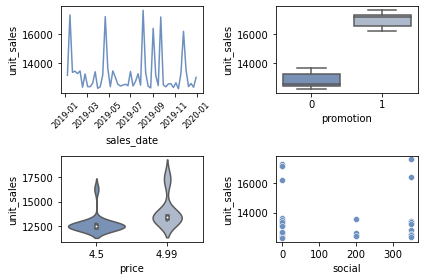

In [13]:
# Set the color palette
sns.set_palette(sns.color_palette("vlag"))

#Initialize subplots with number of rows and number of columns
figure, ax = plt.subplots(nrows = 2, ncols = 2)

#Get readable axis labels for plot 1 which has a date on the x-axis(time series plot)
plt.sca(ax[0, 0])
plt.xticks(rotation=45, fontsize = 8)
#plt.xticks([]) #This disables the x-ticks (uncomment and run if you prefer the x-axis to be blank)

#See the distribution of the data
sns.lineplot(data=df, x="sales_date",y="unit_sales", ax=ax[0,0])
sns.boxplot(data=df, x="promotion", y="unit_sales", ax=ax[0,1])
sns.scatterplot(data=df, x="social", y="unit_sales", ax=ax[1,1])
sns.violinplot(data=df, x="price", y="unit_sales", ax=ax[1,0])

#Gives a tidy layout
plt.tight_layout()

#Show plot
plt.show()

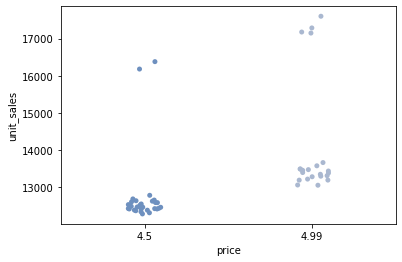

In [14]:
#A closer look at price
sns.stripplot(x="price", y="unit_sales", data=df)
plt.show()

In [15]:
#Correlation Plot Matrix
#Pearson is the default correlation method that is used for normally distributed data
corr = df.corr(method = "pearson")
print(corr)

            unit_sales  promotion    social     price
unit_sales    1.000000   0.946621  0.075890  0.469519
promotion     0.946621   1.000000  0.067907  0.178068
social        0.075890   0.067907  1.000000 -0.004650
price         0.469519   0.178068 -0.004650  1.000000


In [16]:
corr.style.background_gradient(cmap='RdBu')

,unit_sales,promotion,social,price
unit_sales,1.000000,0.946621,0.075890,0.469519
promotion,0.946621,1.000000,0.067907,0.178068
social,0.075890,0.067907,1.000000,-0.004650
price,0.469519,0.178068,-0.004650,1.000000


## Export simulated dataset

In [17]:
#Save simulated dataset as a csv file or excel file
df.to_csv("datasets/weekly_sales_data.csv")

In [18]:
#Save as an Excel file
#Using to_excel from pandas
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#
df.to_excel("datasets/weekly_sales_data.xlsx", sheet_name='Sheet1')

In [19]:
#Check if files exist in directory we designated above using os package
import os

#Check file one - csv file
os.path.isfile("datasets/weekly_sales_data.csv")

#Check file two - Excel sheets
os.path.isfile("datasets/weekly_sales_data.xlsx")

True

***

#### References

[1]  Chapman, C. and McDonnell Feit, E., (2015). R for marketing research
    and analytics. Cham: Springer, pp.47-59, 162-191.